In [54]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.patches as mpatches
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from IPython.display import display, Markdown

pd.set_option('float_format', '{:.2f}'.format)
plt.rcParams.update({'font.size': 28})

def mprint(s):
    display(Markdown(s))

bucket = 'CIC_IDS_2017_Tuesday'
df = pd.read_pickle(f'../dataset/CIC_IDS_2017/{bucket}.pkl')

In [55]:
plots_series = [
    'active_flows:flows_as_client', 
    'active_flows:flows_as_server',
    'contacts:num_as_client', 
    'contacts:num_as_server'
]

def describe_mtimeseries(key, mtimeserie):
    display(Markdown(f'### {key}'))
    # Data description ..... #
    start = min(mtimeserie.index)
    end = max(mtimeserie.index)
    mprint(f'Data range: {start} / {end} ({(end-start)})')
    mprint(f'Measurements available: {len(mtimeserie)}')
    # Time deltas ..... #
    delta = np.diff(np.sort(mtimeserie.index.values))
    blind_spot = [(i, x_delta) for (i, x_delta) in enumerate(delta)]
    blind_spot = [mtimeserie.index[i:i+2] for i, x_delta in blind_spot]
    blind_spot = list(filter(lambda x: x[1]-x[0] > pd.Timedelta(seconds=30), blind_spot))
    # Description ..... #
    display(mtimeserie.describe())
    # Scaling ..... #
    clean_scaled_ts = mtimeserie - mtimeserie.min()
    clean_scaled_ts /= (mtimeserie.max()-mtimeserie.min())+1e-7
    # Plotting clean data ..... #
    axes = clean_scaled_ts[plots_series].plot(subplots=True, figsize=(25,17))
    # clean_scaled_ts.plot(subplots=True, figsize=(12,150))
    # Plotting blind spots ..... #
    for ax in axes:
        for (bstart, bend) in blind_spot:
            ax.axvspan(bstart, bend, color='grey', alpha=0.5)
            handles, labels = ax.get_legend_handles_labels()
            patch = mpatches.Patch(color='grey', label='Missing')
            handles.append(patch) 
            ax.legend(handles=handles, loc='upper center')
    # Titles and save ..... #
    plt.gcf().suptitle(key, fontsize=36, y=.94)
    plt.savefig(f'imgs/{bucket}_{key}.png')
    plt.show()
    
    mprint(f"<br>{'-'*50}<br>{'-'*50}<br>")

# Host Descripiton

### Tuesday, Patator: 192.168.10.50 (server)

Data range: 2020-03-21 09:41:30 / 2020-03-21 11:12:00 (0 days 01:30:30)

Measurements available: 200

_key,active_flows:flows_as_client,active_flows:flows_as_server,contacts:num_as_client,contacts:num_as_server,dns_qry_rcvd_rsp_sent:queries_packets,dns_qry_rcvd_rsp_sent:replies_error_packets,dns_qry_rcvd_rsp_sent:replies_ok_packets,dns_qry_sent_rsp_rcvd:queries_packets,dns_qry_sent_rsp_rcvd:replies_error_packets,dns_qry_sent_rsp_rcvd:replies_ok_packets,...,total_flows:flows_as_client,total_flows:flows_as_server,traffic:bytes_rcvd,traffic:bytes_sent,udp_pkts:packets_rcvd,udp_pkts:packets_sent,udp_sent_unicast:bytes_sent_non_unicast,udp_sent_unicast:bytes_sent_unicast,unreachable_flows:flows_as_client,unreachable_flows:flows_as_server
count,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,...,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00
mean,19.04,19.82,3.90,1.30,0.00,0.00,0.00,1211.31,89.74,1121.57,...,883.89,1697.99,4623307.37,3799450.06,1310.64,1640.64,3639.54,199579.45,0.00,0.00
std,32.89,13.12,5.27,0.77,0.00,0.00,0.00,717.01,47.30,670.16,...,528.80,1512.80,3306322.41,3001773.22,764.59,933.39,1553.36,108826.78,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,783.00,0.00,9.00,783.00,0.00,0.00,0.00
25%,3.92,2.00,2.00,1.00,0.00,0.00,0.00,546.00,56.00,490.00,...,363.50,67.00,780087.50,654474.50,617.00,811.00,2703.00,108011.00,0.00,0.00
50%,10.00,27.67,3.00,1.33,0.00,0.00,0.00,1234.00,80.00,1154.00,...,948.00,1472.00,5310236.75,3546606.00,1329.00,1668.00,2703.00,201274.00,0.00,0.00
75%,20.50,29.50,4.00,2.00,0.00,0.00,0.00,1820.00,128.00,1692.00,...,1333.04,3041.96,7534090.62,6463533.42,1957.25,2443.83,5914.00,292009.17,0.00,0.00
max,285.67,42.00,39.33,3.00,0.00,0.00,0.00,2288.00,160.00,2128.00,...,1655.00,4303.00,9330625.00,8937407.00,2456.00,3065.00,5914.00,364998.00,0.00,0.00


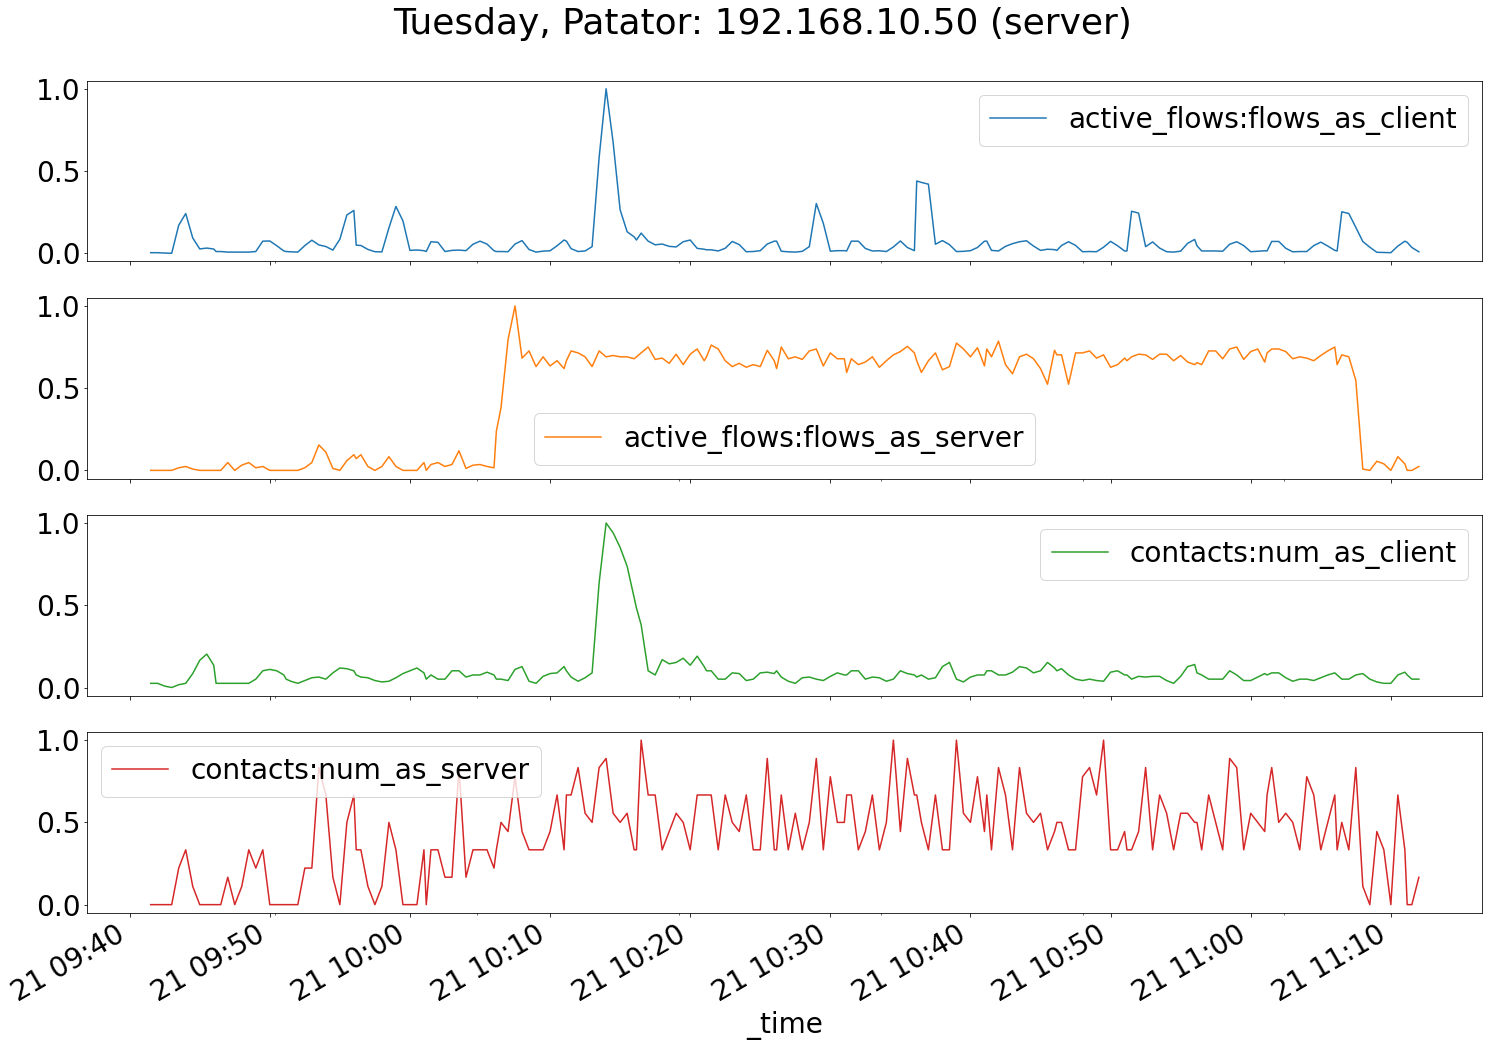

<br>--------------------------------------------------<br>--------------------------------------------------<br>

In [56]:
devices = df.index.droplevel(2).unique()
devices = devices[[-2]]

for device_type, ip in devices:
    host_ts = df.loc[device_type].loc[ip]
    abc = describe_mtimeseries(f'Tuesday, Patator: {ip} ({device_type})', host_ts[:200])

# Mean value category description